# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [3]:
df=pd.read_csv("/Users/zhuzhiwen/Downloads/Unit0204/data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [6]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [7]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

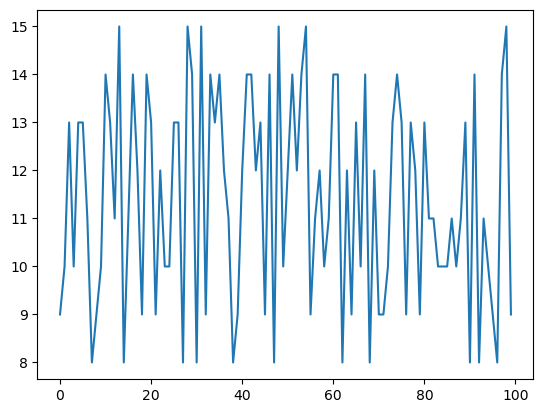

In [8]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

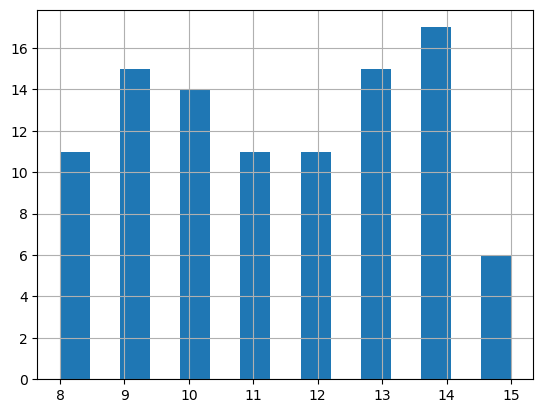

In [11]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [12]:
df.國文.mean()

11.39

算標準差。

In [13]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [14]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [15]:
df.corr()

/var/folders/kr/yp9msdks48d7x19pn9l_d_pc0000gn/T/ipykernel_66644/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [16]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [57]:
df["總級分"]=df.sum(axis=1)
df

/var/folders/kr/yp9msdks48d7x19pn9l_d_pc0000gn/T/ipykernel_66644/815273746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["總級分"]=df.sum(axis=1)


,姓名,國文,英文,數學,自然,社會,加權,總級分
0,劉俊安,9,10,15,10,13,49,106
1,胡玉華,10,10,10,8,9,40,87
2,黃淑婷,13,15,8,11,14,44,105
3,陳上紫,10,10,8,9,14,36,87
4,崔靜成,13,12,14,12,13,53,117
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37,92
96,吳筱婷,8,10,14,10,15,46,103
97,陳家銘,14,9,11,8,12,45,99
98,李明威,15,9,8,9,15,40,96


### 【技巧】

有計算的當然也可以的。

In [20]:
df["加權"]=df.國文+df.英文+df.數學*2

In [58]:
df

,姓名,國文,英文,數學,自然,社會,加權,總級分
0,劉俊安,9,10,15,10,13,49,106
1,胡玉華,10,10,10,8,9,40,87
2,黃淑婷,13,15,8,11,14,44,105
3,陳上紫,10,10,8,9,14,36,87
4,崔靜成,13,12,14,12,13,53,117
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37,92
96,吳筱婷,8,10,14,10,15,46,103
97,陳家銘,14,9,11,8,12,45,99
98,李明威,15,9,8,9,15,40,96


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [59]:
df.sort_values(by="總級分",ascending=False)

,姓名,國文,英文,數學,自然,社會,加權,總級分
57,胡淳茜,12,15,14,13,11,55,120
25,蔡亦瑄,13,13,14,13,12,54,119
83,李士賢,10,14,15,13,13,54,119
36,詹威德,12,13,15,10,14,55,119
37,曾怡君,11,12,15,13,14,53,118
...,...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,36,87
32,林建亨,9,11,8,8,11,36,83
38,吳文伯,8,8,8,15,12,32,83
7,林金鳳,8,9,10,10,8,37,82


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [68]:
df2=df.sort_values(by=["加權","總級分"],ascending=False)
df2

,姓名,國文,英文,數學,自然,社會,加權,總級分
73,吳志遠,13,15,15,8,8,58,117
57,胡淳茜,12,15,14,13,11,55,120
36,詹威德,12,13,15,10,14,55,119
25,蔡亦瑄,13,13,14,13,12,54,119
83,李士賢,10,14,15,13,13,54,119
...,...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,36,87
84,胡凱琳,10,8,9,9,15,36,87
32,林建亨,9,11,8,8,11,36,83
18,梁慧君,9,8,8,8,12,33,78


### 【重點】重設 index

In [66]:
df2.index=range(1,101)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [43]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
36,詹威德,12,13,15,10,14,64,55
83,李士賢,10,14,15,13,13,65,54
37,曾怡君,11,12,15,13,14,65,53
67,林哲法,14,9,15,10,14,62,53
24,陳竹伯,10,12,15,10,14,61,52
70,葉儀依,9,13,15,8,14,59,52
76,周育霖,9,12,15,13,12,61,51
85,張雅彬,10,11,15,12,8,56,51
59,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [38]:
df2[(df2.數學==15)&(df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [69]:
df2.drop("總級分",axis=1)

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
83,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,36
84,胡凱琳,10,8,9,9,15,36
32,林建亨,9,11,8,8,11,36
18,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [71]:
df2.drop("總級分",axis=1,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
83,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,36
84,胡凱琳,10,8,9,9,15,36
32,林建亨,9,11,8,8,11,36
18,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [75]:
df2.drop(5)

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
83,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,36
84,胡凱琳,10,8,9,9,15,36
32,林建亨,9,11,8,8,11,36
18,梁慧君,9,8,8,8,12,33


In [80]:
df2

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
83,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,36
84,胡凱琳,10,8,9,9,15,36
32,林建亨,9,11,8,8,11,36
18,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [91]:
df2[df2.姓名=="李士賢"]
df

,姓名,國文,英文,數學,自然,社會,加權,總級分
0,劉俊安,9,10,15,10,13,49,106
1,胡玉華,10,10,10,8,9,40,87
2,黃淑婷,13,15,8,11,14,44,105
3,陳上紫,10,10,8,9,14,36,87
4,崔靜成,13,12,14,12,13,53,117
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37,92
96,吳筱婷,8,10,14,10,15,46,103
97,陳家銘,14,9,11,8,12,45,99
98,李明威,15,9,8,9,15,40,96


In [89]:
df2.drop(df2[df2.姓名=="李士賢"].index)


,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
44,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,36
84,胡凱琳,10,8,9,9,15,36
32,林建亨,9,11,8,8,11,36
18,梁慧君,9,8,8,8,12,33


In [90]:
df2[df2.姓名=="李士賢"]

,姓名,國文,英文,數學,自然,社會,加權
83,李士賢,10,14,15,13,13,54


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [18]:
import pandas_datareader as pdr
import yfinance as yf
df = yf.download('AAPL',start = '2020-03-16', end='2021-05-22')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-16,60.487499,64.769997,60.000000,60.552502,59.290058,322423600
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.897041,324056000
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.381802,300233600
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.919159,271857200
2020-03-20,61.794998,62.957500,57.000000,57.310001,56.115154,401693200
...,...,...,...,...,...,...
2021-05-17,126.820000,126.930000,125.169998,126.269997,124.807426,74244600
2021-05-18,126.559998,126.989998,124.779999,124.849998,123.403870,63342900
2021-05-19,123.160004,124.919998,122.860001,124.690002,123.245743,92612000


In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [10]:
import yfinance as yf

# 设置股票代码和时间范围
stock_symbol = 'AAPL'
start_date = '2021-01-01'
end_date = '2021-12-31'

# 从 Yahoo Finance 获取股票价格数据
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# 打印前几行数据
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  127.503654   
2021-01-05  128.889999  131.740005  128.429993  131.009995  129.080063   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.735023   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.991409   
2021-01-08  132.429993  132.630005  130.229996  132.050003  130.104752   

               Volume  
Date                   
2021-01-04  143301900  
2021-01-05   97664900  
2021-01-06  155088000  
2021-01-07  109578200  
2021-01-08  105158200  


In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-16,60.487499,64.769997,60.000000,60.552502,59.290058,322423600
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.897041,324056000
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.381802,300233600
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.919159,271857200
2020-03-20,61.794998,62.957500,57.000000,57.310001,56.115154,401693200


#### 只要最後 300 個交易日!

In [21]:
df=df[-300:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-16,60.487499,64.769997,60.000000,60.552502,59.290058,322423600
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.897041,324056000
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.381802,300233600
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.919159,271857200
2020-03-20,61.794998,62.957500,57.000000,57.310001,56.115154,401693200
...,...,...,...,...,...,...
2021-05-17,126.820000,126.930000,125.169998,126.269997,124.807426,74244600
2021-05-18,126.559998,126.989998,124.779999,124.849998,123.403870,63342900
2021-05-19,123.160004,124.919998,122.860001,124.690002,123.245743,92612000


#### 20 日的移動平均

<Axes: xlabel='Date'>

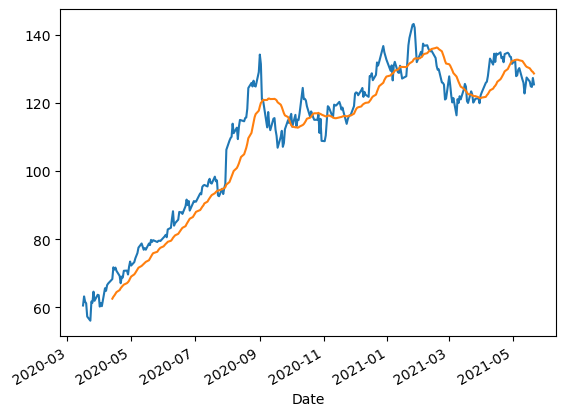

In [25]:
df.Close.plot()
df.Close.rolling(20).mean().plot()

<Axes: xlabel='Date'>

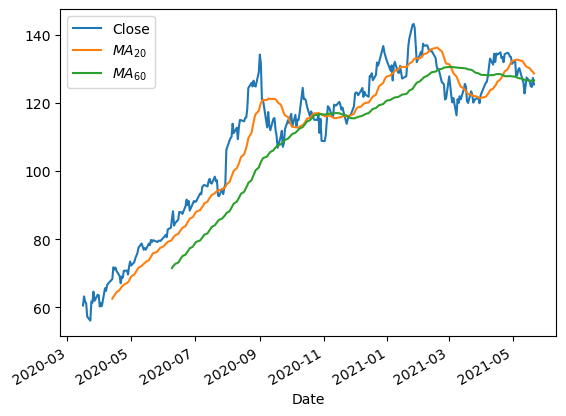

In [27]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

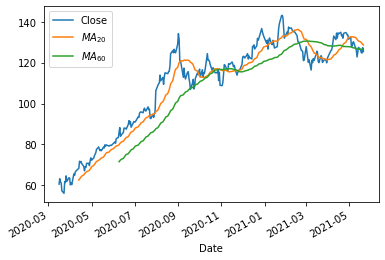

In [68]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [30]:
close=df.Close.values
close
len(close)

300

In [38]:
x=close[:-1]
len(x)
x

array([ 60.55250168,  63.21500015,  61.66749954,  61.19499969,
        57.31000137,  56.09249878,  61.72000122,  61.38000107,
        64.61000061,  61.93500137,  63.70249939,  63.57249832,
        60.22750092,  61.23249817,  60.35250092,  65.61750031,
        64.85749817,  66.51750183,  66.99749756,  68.3125    ,
        71.76249695,  71.10749817,  71.67250061,  70.69999695,
        69.23249817,  67.09249878,  69.02500153,  68.75749969,
        70.74250031,  70.79250336,  69.64499664,  71.93250275,
        73.44999695,  72.26750183,  73.29000092,  74.38999939,
        75.15750122,  75.93499756,  77.53250122,  78.75250244,
        77.85250092,  76.91249847,  77.38500214,  76.92749786,
        78.73999786,  78.28500366,  79.80750275,  79.21250153,
        79.72250366,  79.18250275,  79.52749634,  79.5625    ,
        79.48500061,  80.46250153,  80.83499908,  81.27999878,
        80.58000183,  82.875     ,  83.36499786,  85.99749756,
        88.20999908,  83.97499847,  84.69999695,  85.74

299

In [39]:
y=close[1:]
len(y)
y

array([ 63.21500015,  61.66749954,  61.19499969,  57.31000137,
        56.09249878,  61.72000122,  61.38000107,  64.61000061,
        61.93500137,  63.70249939,  63.57249832,  60.22750092,
        61.23249817,  60.35250092,  65.61750031,  64.85749817,
        66.51750183,  66.99749756,  68.3125    ,  71.76249695,
        71.10749817,  71.67250061,  70.69999695,  69.23249817,
        67.09249878,  69.02500153,  68.75749969,  70.74250031,
        70.79250336,  69.64499664,  71.93250275,  73.44999695,
        72.26750183,  73.29000092,  74.38999939,  75.15750122,
        75.93499756,  77.53250122,  78.75250244,  77.85250092,
        76.91249847,  77.38500214,  76.92749786,  78.73999786,
        78.28500366,  79.80750275,  79.21250153,  79.72250366,
        79.18250275,  79.52749634,  79.5625    ,  79.48500061,
        80.46250153,  80.83499908,  81.27999878,  80.58000183,
        82.875     ,  83.36499786,  85.99749756,  88.20999908,
        83.97499847,  84.69999695,  85.74749756,  88.01

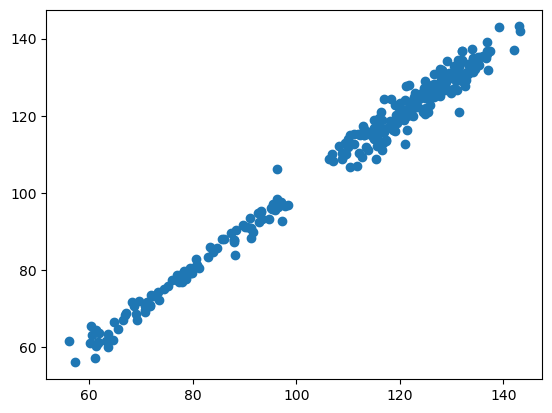

In [41]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [45]:
mydata = np.random.randn(4,3)
mydata

array([[-0.22595714, -0.88671869,  1.26079981],
       [ 0.24860765,  1.10700123, -1.27108505],
       [ 0.04004438,  0.66562197, -0.35314081],
       [-0.26109221,  1.0582412 , -0.28057258]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [50]:
df2=pd.DataFrame(mydata,columns=list("abc"))
df2

,a,b,c
0,-0.225957,-0.886719,1.260800
1,0.248608,1.107001,-1.271085
2,0.040044,0.665622,-0.353141
3,-0.261092,1.058241,-0.280573


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [52]:
df3=pd.DataFrame(np.random.randn(3,3),columns=list("abc"))
df3

,a,b,c
0,0.409262,2.501826,-2.160107
1,-0.178967,2.710606,1.367080
2,-0.987617,-0.521201,0.532249


In [54]:
df4=pd.concat([df2,df3],axis=0)
df4

,a,b,c
0,-0.225957,-0.886719,1.260800
1,0.248608,1.107001,-1.271085
2,0.040044,0.665622,-0.353141
3,-0.261092,1.058241,-0.280573
0,0.409262,2.501826,-2.160107
1,-0.178967,2.710606,1.367080
2,-0.987617,-0.521201,0.532249


In [58]:
df4.index=range(7)
df4

,a,b,c
0,-0.225957,-0.886719,1.260800
1,0.248608,1.107001,-1.271085
2,0.040044,0.665622,-0.353141
3,-0.261092,1.058241,-0.280573
4,0.409262,2.501826,-2.160107
5,-0.178967,2.710606,1.367080
6,-0.987617,-0.521201,0.532249


前面我們弄得亂七八糟的 index 重設一下。

#### 横向的貼

In [59]:
df5=pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [60]:
df5

,a,b,c,a,b,c
0,-0.225957,-0.886719,1.260800,0.409262,2.501826,-2.160107
1,0.248608,1.107001,-1.271085,-0.178967,2.710606,1.367080
2,0.040044,0.665622,-0.353141,-0.987617,-0.521201,0.532249
3,-0.261092,1.058241,-0.280573,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [63]:
df_names=pd.read_csv("/Users/zhuzhiwen/Downloads/Unit0204/data/names.csv",names=["姓名"])


In [64]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [18]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [66]:
df_grades=pd.DataFrame(np.random.randint(6,16,(100,5)),
 columns=["國文","英文","數學","社會","自然"])                      

In [67]:
df_grades

,國文,英文,數學,社會,自然
0,8,15,11,9,10
1,12,7,14,15,15
2,8,8,10,10,13
3,11,13,6,7,11
4,9,14,15,6,6
...,...,...,...,...,...
95,11,11,15,13,14
96,12,6,6,9,12
97,8,8,9,7,9
98,11,11,9,11,12


In [70]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [73]:
df_grades

,國文,英文,數學,社會,自然
0,12,8,6,12,7
1,9,10,10,6,6
2,14,15,6,14,9
3,9,10,10,11,8
4,9,9,12,7,12
...,...,...,...,...,...
95,15,7,14,10,15
96,13,9,7,13,12
97,14,8,10,15,8
98,8,6,6,15,12


In [84]:
df_grades.to_csv("data/grade10.csv",index=0)

In [78]:
df_x=pd.concat([df_names,df_grades],axis=1)
df_x

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,12,8,6,12,7
1,王紹尹,9,10,10,6,6
2,黃季坤,14,15,6,14,9
3,許正書,9,10,10,11,8
4,張鈞蓮,9,9,12,7,12
...,...,...,...,...,...,...
95,陳君生,15,7,14,10,15
96,曾桂甫,13,9,7,13,12
97,林欣怡,14,8,10,15,8
98,林佳霖,8,6,6,15,12
